In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import joblib

In [228]:
df = pd.read_csv('../sample/sample.csv')
df.head()

,protocol,pkt_len,pkt_rate,pkt_count,ip_ttl,label
0,ICMP,60,1111.5,48,64,DDOS-Attack
1,ICMP,60,24852.0,47,64,DDOS-Attack
2,ICMP,60,19083.9,20,128,DDOS-Attack
3,TCP,1191,473.6,8,128,Normal
4,ICMP,60,14501.8,48,128,DDOS-Attack


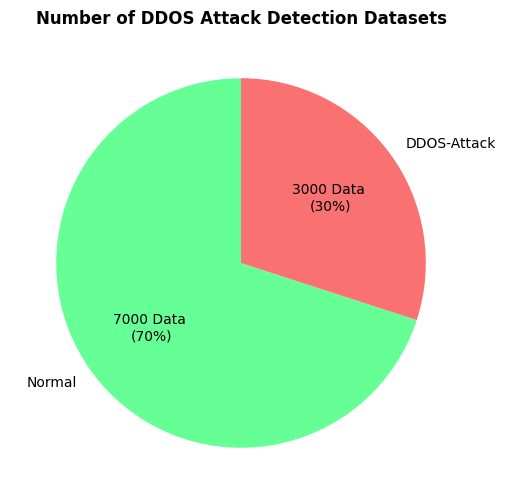

In [229]:
label_counts = df['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f"{int(round(pct/100.*sum(sizes)))} Data \n({pct:.0f}%)",
    startangle=90,
    colors=["#66ff96", "#fa7171"]
)

plt.title("Number of DDOS Attack Detection Datasets", fontsize=12, fontweight="bold")
plt.show()


In [230]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

protocol_encoder = LabelEncoder()
df['protocol'] = protocol_encoder.fit_transform(df['protocol'])

In [231]:
X = df.drop('label', axis=1)
y = df['label']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [233]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [234]:
y_pred = model.predict(X_test)

In [235]:
def format_metric(value):
    if value in [0, 1]:
        return f"{value:.0f} (Presentase: {value*100:.0f}%)"
    else:
        return f"{value:.4f} (Presentase: {value*100:.2f}%)"

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy  = {format_metric(accuracy)}")
print(f"Precision = {format_metric(precision)}")
print(f"Recall    = {format_metric(recall)}")
print(f"F1-Score  = {format_metric(f1)}")

Accuracy  = 1 (Presentase: 100%)
Precision = 1 (Presentase: 100%)
Recall    = 1 (Presentase: 100%)
F1-Score  = 1 (Presentase: 100%)


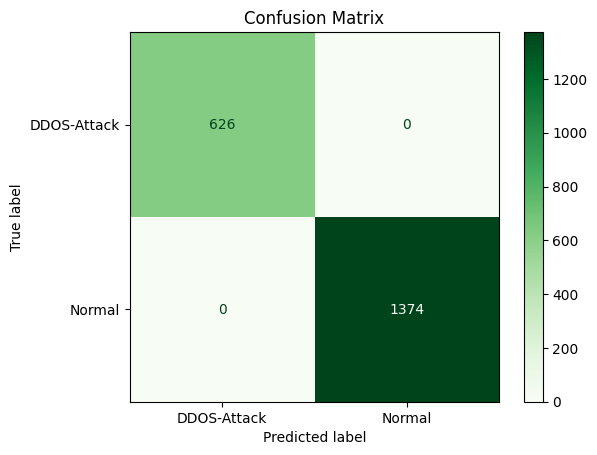

In [236]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=label_encoder.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

In [237]:
# joblib.dump(model, 'ddos_model.pkl')
# joblib.dump(label_encoder, 'label_encoder.pkl')

# print("\nModel dan preprocessor disimpan!")